<a href="https://colab.research.google.com/github/vaishnavimishra417/heart-disease-detection-/blob/main/heart_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving HeartDiseaseTrain-Test.csv to HeartDiseaseTrain-Test.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null

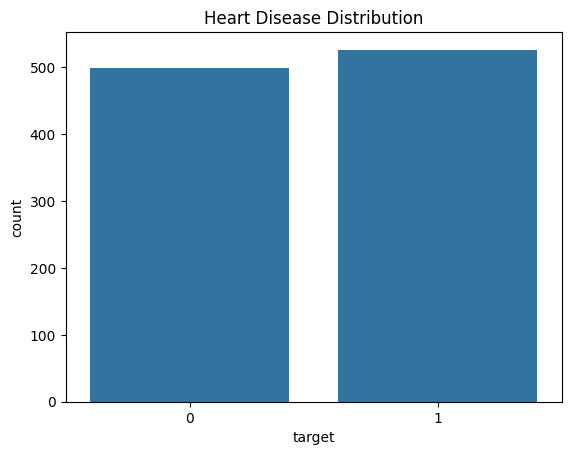

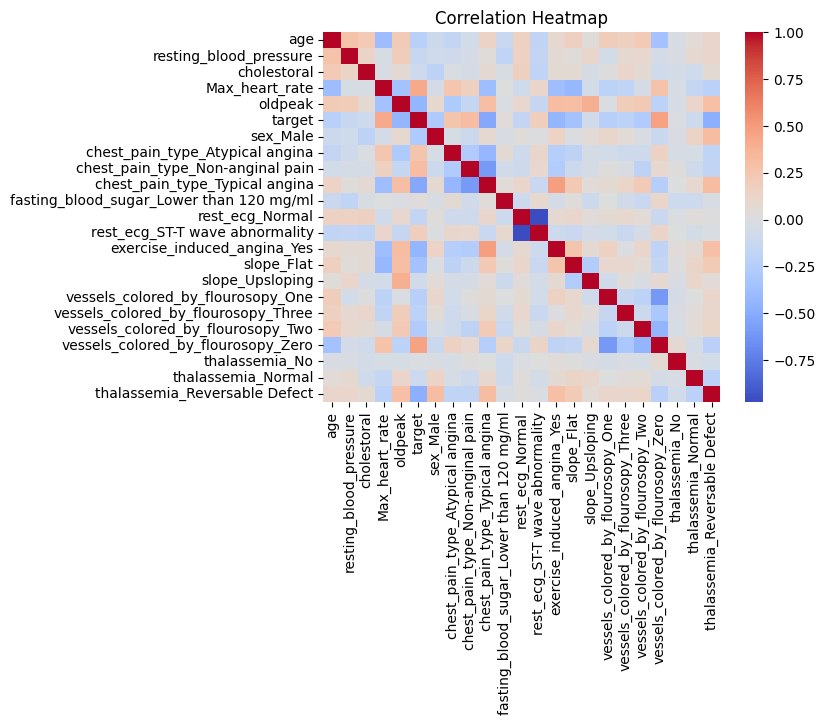

Accuracy: 0.8097560975609757

Confusion Matrix:
 [[76 26]
 [13 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       102
           1       0.78      0.87      0.82       103

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205


🔴 The patient is likely to have heart disease.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

print(df.info())
print(df.describe())

# Check Missing Values
print(df.isnull().sum())

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#Visualization
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()

sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Split Features & Target
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

# Store column names before scaling
X_columns = X.columns

#Standardize Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction & Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
example_new_patient_data = {
    'age': [63],
    'sex': ['Male'], # Assuming 'Male' was one of the categories
    'chest_pain_type': ['Typical angina'], # Assuming 'Typical angina' was one of the categories
    'resting_blood_pressure': [145],
    'cholestoral': [233],
    'fasting_blood_sugar': ['True'], # Assuming 'True' was a category for fasting_blood_sugar
    'rest_ecg': ['Normal'], # Assuming 'Normal' was a category
    'Max_heart_rate': [150],
    'exercise_induced_angina': ['No'], # Assuming 'No' was a category
    'oldpeak': [2.3],
    'slope': ['Flat'], # Assuming 'Flat' was a category
    'vessels_colored_by_flourosopy': ['One'], # Assuming 'One' was a category
    'thalassemia': ['Reversable Defect'] # Assuming 'Reversable Defect' was a category
}

# Create a DataFrame for the new patient
new_patient_df = pd.DataFrame(example_new_patient_data)

# Apply one-hot encoding to the new patient data
new_patient_encoded = pd.get_dummies(new_patient_df, columns=categorical_cols, drop_first=True)

# Ensure all columns present in training data (X) are also present in new_patient_encoded
# and that their order is the same. Fill missing with 0.
missing_columns = set(X_columns) - set(new_patient_encoded.columns)
for c in missing_columns:
    new_patient_encoded[c] = 0

# Reorder columns to match the training data's column order
new_patient_encoded = new_patient_encoded[X_columns]

# Standardize the new patient data using the same scaler
new_patient_scaled = scaler.transform(new_patient_encoded)

# Make prediction
prediction = model.predict(new_patient_scaled)

if prediction == 1:
    print("\n🔴 The patient is likely to have heart disease.")
else:
    print("\n🟢 The patient is likely healthy.")